<a href="https://colab.research.google.com/github/pedrosantos-code/Exercicio_py/blob/main/CP1_Entrega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# NOME DO ALUNO: Pedro Pereira dos Santos
# MATRÍCULA: RM552047

In [ ]:
#20 ---------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importação das principais bibliotecas para manipulação, análise e visualização de dados.

In [ ]:
#2 ---------------------------
survey = pd.read_csv('/content/CP1 Stack Overflow.csv')
len(survey.columns)

# Carrega o arquivo CSV em um DataFrame e exibe a quantidade de colunas presentes.

84

In [ ]:
#3 ---------------------------
survey.info()

# Exibe informações sobre o DataFrame:
# - 84 colunas no total.
# - 1 coluna com tipo inteiro (int64).
# - 3 colunas com tipo flutuante (float64).
# - Uso de memória: 57.2 MB.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In [ ]:
#4 ---------------------------
selected_columns = ['MainBranch', 'Age', 'Employment', 'RemoteWork',
                    'EdLevel', 'DevType', 'OrgSize', 'Country',
                    'ConvertedCompYearly', 'WorkExp', 'Industry']

survey_new = survey[selected_columns]

survey_new.head()

# Seleciona um subconjunto de colunas relevantes para análise.
# Cria um novo DataFrame 'survey_new' contendo apenas essas colunas.
# Exibe as primeiras 5 linhas para visualizar os dados filtrados.

,MainBranch,Age,Employment,RemoteWork,EdLevel,DevType,OrgSize,Country,ConvertedCompYearly,WorkExp,Industry
0,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,United States of America,285000.0,10.0,"Information Services, IT, Software Development..."
2,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, back-end","5,000 to 9,999 employees",United States of America,250000.0,23.0,"Information Services, IT, Software Development..."
3,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, front-end",100 to 499 employees,United States of America,156000.0,7.0,NaN
4,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack",20 to 99 employees,Philippines,23456.0,6.0,Other


In [ ]:
#5 ---------------------------
survey_new.info()

# Exibe informações sobre o DataFrame:
# 0 int
# 2 float
# 7.5 MB baseado no info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MainBranch           89184 non-null  object 
 1   Age                  89184 non-null  object 
 2   Employment           87898 non-null  object 
 3   RemoteWork           73810 non-null  object 
 4   EdLevel              87973 non-null  object 
 5   DevType              76872 non-null  object 
 6   OrgSize              65043 non-null  object 
 7   Country              87973 non-null  object 
 8   ConvertedCompYearly  48019 non-null  float64
 9   WorkExp              43579 non-null  float64
 10  Industry             36774 non-null  object 
dtypes: float64(2), object(9)
memory usage: 7.5+ MB


In [ ]:
#6 ---------------------------
mean_workexp = survey['WorkExp'].mean()
median_workexp = survey['WorkExp'].median()
std_workexp = survey['WorkExp'].std()
max_workexp = survey['WorkExp'].max()
min_workexp = survey['WorkExp'].min()

print(f"Média da experiência: {mean_workexp}")
print(f"Mediana da experiência: {median_workexp}")
print(f"Desvio-padrão da experiência: {std_workexp}")
print(f"Máximo da experiência: {max_workexp}")
print(f"Mínimo da experiência: {min_workexp}")

# Calcula e exibe as estatísticas descritivas para a coluna 'WorkExp':

# - Média da experiência: 11.41
# - Mediana da experiência: 9.00
# - Desvio-padrão da experiência: 9.05
# - Valor máximo da experiência: 50:00
# - Valor mínimo da experiência: 0:00


Média da experiência: 11.405126322311204
Mediana da experiência: 9.0
Desvio-padrão da experiência: 9.051989418487764
Máximo da experiência: 50.0
Mínimo da experiência: 0.0


In [ ]:
#7 ---------------------------
Q25 = survey_new['WorkExp'].quantile(0.25)
Q75 = survey_new['WorkExp'].quantile(0.75)

IQR = Q75 - Q25

limite_inferior = Q25 - 1.5 * IQR
limite_superior = Q75 + 1.5 * IQR

limite_inferior = max(limite_inferior, 0)

print(f"Limite inferior: {limite_inferior:.2f}")
print(f"Limite superior: {limite_superior:.2f}")

# Os outliers de experiência de trabalho são aqueles valores fora do intervalo definido pelos limites:

# Limite inferior: 0.00 anos

# Limite superior: 32.50 anos

# Portanto, qualquer valor abaixo de 0.00 anos ou acima de 32.50 anos será considerado um outlier.

Limite inferior: 0.00
Limite superior: 32.50


In [ ]:
#8 ---------------------------
Q25 = survey_new['WorkExp'].quantile(0.25)
Q75 = survey_new['WorkExp'].quantile(0.75)

IQR = Q75 - Q25

limite_inferior = Q25 - 1.5 * IQR
limite_superior = Q75 + 1.5 * IQR

limite_inferior = max(limite_inferior, 0)

outliers = survey_new[(survey_new['WorkExp'] > limite_superior) | (survey_new['WorkExp'] < limite_inferior)]

print(f"A quantidade de observações consideradas outliers: {outliers.shape[0]}")

# A saída indica que 1463 observações foram identificadas como outliers com base nos limites de experiência de trabalho. Esses valores estão fora do intervalo considerado normal para os dados.


A quantidade de observações consideradas outliers: 1463


In [ ]:
#9 ---------------------------
total_devs = len(survey_new)

profissionais = survey_new['MainBranch'].eq('I am a developer by profession').sum()
aprendizes = survey_new['MainBranch'].eq('I am learning to code').sum()

perc_profissionais = (profissionais / total_devs) * 100
perc_aprendizes = (aprendizes / total_devs) * 100

print(f"Desenvolvedores profissionais: {perc_profissionais:.2f}%")
print(f"Aprendizes de programação: {perc_aprendizes:.2f}%")

# Com base nos dados do MainBranch:

# 75.39% dos respondentes são desenvolvedores profissionais.

# 5.56% estão aprendendo a programar.


Desenvolvedores profissionais: 75.39%
Aprendizes de programação: 5.56%


In [ ]:
#10 ---------------------------
print(survey_new.groupby('MainBranch')['WorkExp'].mean().sort_values(ascending=False))
print(survey_new.groupby('MainBranch')['WorkExp'].median().sort_values(ascending=False))

# Médias de Experiência de Trabalho:

# I used to be a developer by profession, but no longer am: 17.46 anos
# I am not primarily a developer, but I write code sometimes as part of my work/studies: 13.51 anos
# I am a developer by profession: 11.20 anos
# I code primarily as a hobby: 11.00 anos
# I am learning to code: 7.10 anos
# None of these: NaN (não disponível)

# Medianas de Experiência de Trabalho:

# I used to be a developer by profession, but no longer am: 17 anos
# I am not primarily a developer, but I write code sometimes as part of my work/studies: 11 anos
# I am a developer by profession: 9 anos
# I code primarily as a hobby: 8 anos
# I am learning to code: 3 anos
# None of these: NaN (não disponível)

MainBranch
I used to be a developer by profession, but no longer am                                 17.458333
I am not primarily a developer, but I write code sometimes as part of my work/studies    13.509826
I am a developer by profession                                                           11.204088
I code primarily as a hobby                                                              11.000000
I am learning to code                                                                     7.097902
None of these                                                                                  NaN
Name: WorkExp, dtype: float64
MainBranch
I used to be a developer by profession, but no longer am                                 17.0
I am not primarily a developer, but I write code sometimes as part of my work/studies    11.0
I am a developer by profession                                                            9.0
I code primarily as a hobby                                             

In [ ]:
#11 ---------------------------
print(survey_new['Country'].nunique())

# Os dados incluem informações de 185 países diferentes.

185


In [ ]:
#12 ---------------------------
selected_countries = survey_new[(survey_new['Country'] == 'Germany') | (survey_new['Country'] == 'Sweden') | (survey_new['Country'] == 'France') | (survey_new['Country'] == 'Netherlands')]

survey_country = pd.DataFrame(selected_countries)

num_records = survey_country.shape[0]

pivot_calculation = survey_country.pivot_table(values='ConvertedCompYearly', index=['Country'], aggfunc=['mean', 'std'])

print(f"Número de observações: {num_records}")
print(pivot_calculation)

# Foram registradas 14,285 observações.
# Netherlands apresenta a maior média salarial: 85,128.48 e o maior desvio padrão: 59,455.49.

Número de observações: 14285
                           mean                 std
            ConvertedCompYearly ConvertedCompYearly
Country                                            
France             65101.007773        37705.684755
Germany            82457.479093        52130.592088
Netherlands        85128.483847        59455.492620
Sweden             65003.224432        45948.621230


In [ ]:
#13 ---------------------------
total_country = survey_country['MainBranch'].shape[0]
dev_country = survey_country[survey_country['MainBranch'] == 'I am a developer by profession'].shape[0]
iniciante_country = survey_country[survey_country['MainBranch'] == 'I am learning to code'].shape[0]

porcentagem_dev = (dev_country / total_country) * 100
porcentagem_iniciante = (iniciante_country / total_country) * 100

total_new = survey_new['MainBranch'].shape[0]
dev_new = survey_new[survey_new['MainBranch'] == 'I am a developer by profession'].shape[0]
iniciante_new = survey_new[survey_new['MainBranch'] == 'I am learning to code'].shape[0]

por_profissao = (dev_new / total_new) * 100
por_iniciante = (iniciante_new / total_new) * 100

print(f"Porcentagem de desenvolvedores nos países selecionados: {porcentagem_dev:.2f}%")
print(f"Porcentagem de aprendizes nos países selecionados: {porcentagem_iniciante:.2f}%")
print(f"Porcentagem de desenvolvedores no dataframe original: {por_profissao:.2f}%")
print(f"Porcentagem de aprendizes no dataframe original: {por_iniciante:.2f}%")

if dev_new > dev_country:
    print("Há mais desenvolvedores profissionais no dataframe original 'survey_new'.")
else:
    print("Há mais desenvolvedores profissionais nos países selecionados no dataframe 'survey_country'.")

# A porcentagem de desenvolvedores profissionais é maior no survey_country.
# Por outro lado, a porcentagem de aprendizes com intenção de se tornar desenvolvedores é maior no survey_new.

Porcentagem de desenvolvedores nos países selecionados: 77.67%
Porcentagem de aprendizes nos países selecionados: 3.28%
Porcentagem de desenvolvedores no dataframe original: 75.39%
Porcentagem de aprendizes no dataframe original: 5.56%
Há mais desenvolvedores profissionais no dataframe original 'survey_new'.


In [ ]:
#14 ---------------------------
survey_country_ind = survey_country[survey_country['Industry'].isin(['Information Services', 'IT', 'Software Development', 'Technology', 'Financial Services', 'Insurance'])]

remuneracao_media = survey_country_ind.groupby(['Country', 'Industry'])['ConvertedCompYearly'].mean()

print(remuneracao_media)

#A maior média salarial é na indústria 'Financial Services' no país 'Netherlands', com um valor de 100696.18.
#A menor média salarial é na indústria 'Insurance' no país 'France', com um valor de 58325.50.

Country      Industry          
France       Financial Services     98275.422535
             Insurance              58325.500000
Germany      Financial Services     91857.378205
             Insurance              75314.130435
Netherlands  Financial Services    100696.184211
             Insurance              66016.818182
Sweden       Financial Services     72295.949367
             Insurance              66510.833333
Name: ConvertedCompYearly, dtype: float64


In [ ]:
#15 ---------------------------
experiencia_ind = survey_country_ind.groupby('Industry')['WorkExp'].mean()

print(experiencia_ind)

# A indústria com mais experiência é: Financial Services, com uma média de 12.02 anos.
# A indústria com menos experiência é: Insurance, com uma média de 11.19 anos.

Industry
Financial Services    12.024390
Insurance             11.188889
Name: WorkExp, dtype: float64


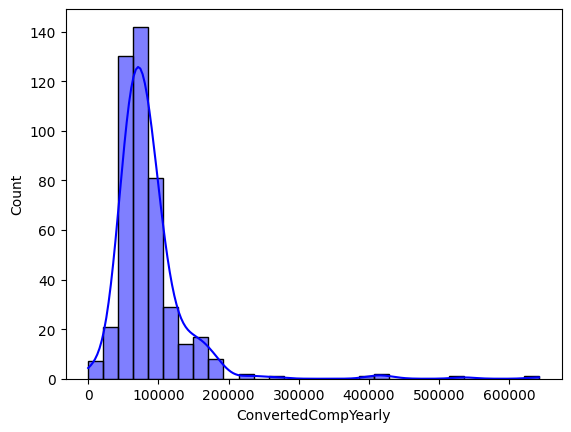

In [ ]:
#16 ---------------------------
sns.histplot(data=survey_country_ind, x='ConvertedCompYearly', color='blue', bins=30, kde=True)

sns.reset_orig()

plt.show()

#Gráfico de histograma (histplot) mostra a distribuição dos salários anuais, destacando a frequência de diferentes faixas salariais.

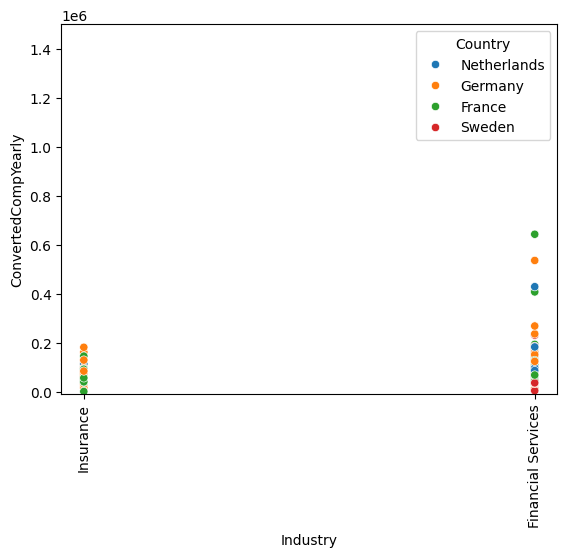

In [ ]:
#17 ---------------------------
sns.scatterplot(data=survey_country_ind, x='Industry', y='ConvertedCompYearly', hue='Country')

plt.xticks(rotation = 90)

plt.ylim(-10000, 1500000)

plt.show()

#Gráfico de dispersão (scatterplot) mostra a relação entre a indústria e o salário anual convertido, destacando a distribuição dos salários por setor.

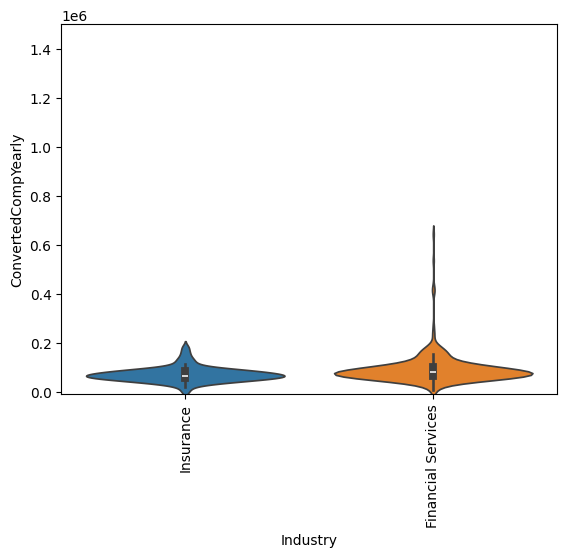

In [ ]:
#18 ---------------------------
sns.violinplot(data=survey_country_ind, y='ConvertedCompYearly', x='Industry', hue='Industry')

plt.xticks(rotation = 90)

plt.ylim(-10000, 1500000)

plt.show()

#Gráfico de violino (violinplot) exibe a distribuição salarial por indústria, mostrando a variação e a densidade dos salários dentro de cada setor.

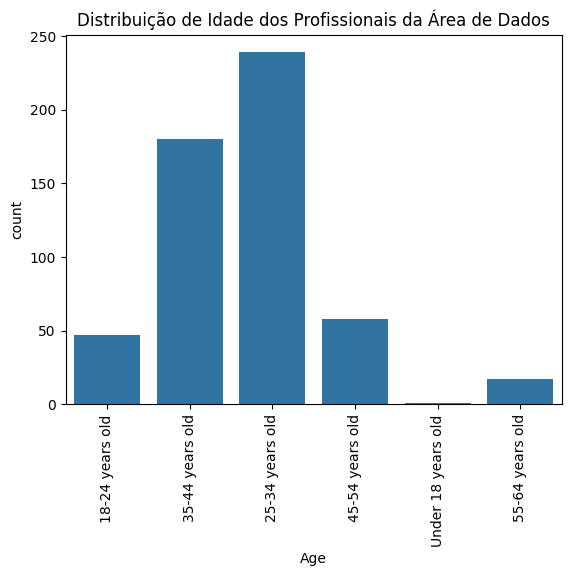

In [ ]:
#19 ---------------------------
sns.countplot(data=survey_country_ind, x='Age')
plt.title('Distribuição de Idade dos Profissionais da Área de Dados')

plt.xticks(rotation=90)

plt.show()

#Gráfico de contagem (countplot) exibe a distribuição de indivíduos na faixa etária de 25 a 34 anos, mostrando a quantidade de pessoas em cada categoria analisada.


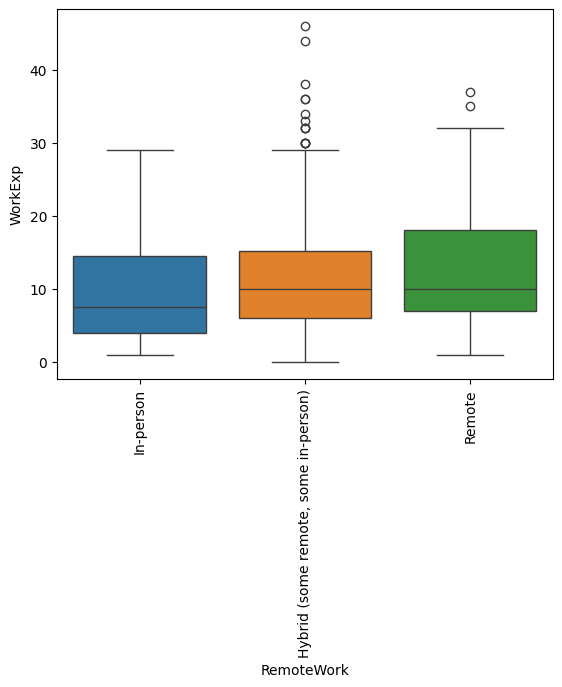

In [ ]:
#20 ---------------------------
sns.boxplot(data=survey_country_ind, y='WorkExp', x='RemoteWork', hue='RemoteWork')

plt.xticks(rotation=90)

plt.show()

#Gráfico de caixa (boxplot) mostra a relação entre a experiência de trabalho e a modalidade remota, destacando as diferenças entre quem trabalha de casa e quem não trabalha remotamente.